In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)

2. Работа с табличными данными в <a href='http://pandas.pydata.org/pandas-docs/stable/'>Pandas</a>
----------
Pandas может представлять массивы NumPy с метками для строк и столбцов. Начнем с примера.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


Ответим на некоторые вопросы о представленном наборе данных.

**Посмотрим на распределение возраста пассажиров Титаника**

<AxesSubplot:>

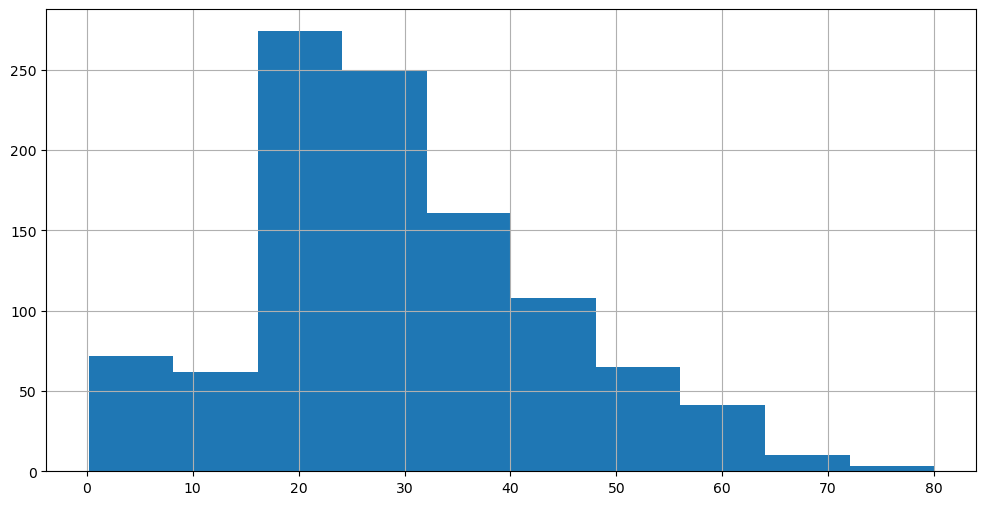

In [6]:
df['age'].hist()

**Скольким мужчинам / женщинам удалось выжить?**

In [7]:
pd.crosstab(df['sex'], df['survived'])

survived,0,1
sex,,
female,127,339
male,682,161


In [8]:
pd.crosstab(df['sex'], df['survived'], normalize=0)

survived,0,1
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


**А каковы доли выживших в различных ценовых классах?**

In [9]:
df.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

<AxesSubplot:xlabel='pclass'>

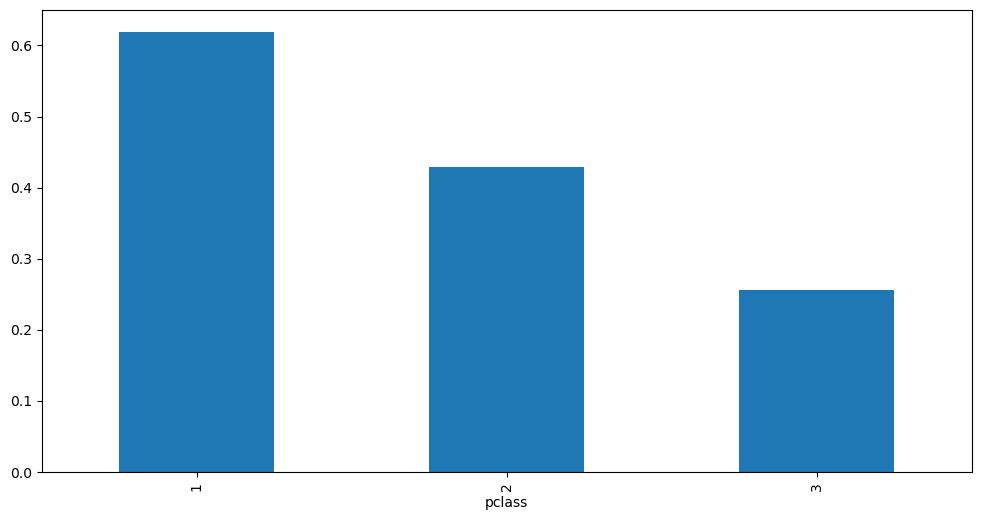

In [10]:
df.groupby('pclass')['survived'].mean().plot(kind='bar')

## 2.1. Структуры данных в Pandas

### 2.1.1. DataFrame

`DataFrame` - представление данных в виде таблицы. Основными атрибутами являются `index` и `columns`.

In [11]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [12]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [13]:
df.values

array([[1, 1, 'Allen, Miss. Elisabeth Walton', ..., '2', nan,
        'St Louis, MO'],
       [1, 1, 'Allison, Master. Hudson Trevor', ..., '11', nan,
        'Montreal, PQ / Chesterville, ON'],
       [1, 0, 'Allison, Miss. Helen Loraine', ..., nan, nan,
        'Montreal, PQ / Chesterville, ON'],
       ...,
       [3, 0, 'Zakarian, Mr. Mapriededer', ..., nan, 304.0, nan],
       [3, 0, 'Zakarian, Mr. Ortin', ..., nan, nan, nan],
       [3, 0, 'Zimmerman, Mr. Leo', ..., nan, nan, nan]], dtype=object)

Для предварительного анализа пригодятся встроенные функции:

In [14]:
df.shape

(1309, 14)

In [15]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


`DataFrame` можно создать с помощью словаря Python.

In [17]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


<p><a name="series"></a></p>
### 2.1.2. Series

`Series` служит для представления одномерных данных. Проще говоря, это столбец `DataFrame`.

In [18]:
df['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [19]:
df.pclass

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

Основными атрибутами `Series` являются `index` и `values`.

In [20]:
df['pclass'].index

RangeIndex(start=0, stop=1309, step=1)

In [21]:
df['pclass'].values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
df['pclass'][1]

1

К `Series` можно применять различные операции.

In [23]:
df['age'] * 10

0       290.000
1         9.167
2        20.000
3       300.000
4       250.000
         ...   
1304    145.000
1305        NaN
1306    265.000
1307    270.000
1308    290.000
Name: age, Length: 1309, dtype: float64

In [24]:
df['fare'].mean()

33.29547928134572

In [25]:
df['name'].apply(lambda x: x.split(',')[1])

0                        Miss. Elisabeth Walton
1                         Master. Hudson Trevor
2                           Miss. Helen Loraine
3                   Mr. Hudson Joshua Creighton
4        Mrs. Hudson J C (Bessie Waldo Daniels)
                         ...                   
1304                               Miss. Hileni
1305                              Miss. Thamine
1306                            Mr. Mapriededer
1307                                  Mr. Ortin
1308                                    Mr. Leo
Name: name, Length: 1309, dtype: object

In [26]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [27]:
df['surname'] = df['name'].apply(lambda x: x.split(',')[0])

In [28]:
q = df['fare'].quantile(0.75)
q

31.275

In [29]:
def expensive_ticket(fare):
    return 'Expensive' if (fare > q) else 'Cheap'

In [30]:
df['fare'].apply(expensive_ticket)

0       Expensive
1       Expensive
2       Expensive
3       Expensive
4       Expensive
          ...    
1304        Cheap
1305        Cheap
1306        Cheap
1307        Cheap
1308        Cheap
Name: fare, Length: 1309, dtype: object

**Задание 1**
+ Какой была максимальная цена билета? Медиана?
+ Какова доля выживших?
+ Сколько мужчин / женщин находилось на борту?

In [44]:
print('Максимальная цена билета: ',df['fare'].describe()['mean'])

Максимальная цена билета:  33.29547928134572


In [45]:
print('Медиана: ',df['fare'].median())

Медиана:  14.4542


In [46]:
print('Доля выживших: ', df['survived'].mean())

Доля выживших:  0.3819709702062643


In [47]:
print('Количество мужчин на борту: ', df[df['sex'] == 'male'].shape[0])

Количество мужчин на борту:  843


In [48]:
print('Количество женщин на борту: ', df[df['sex'] == 'female'].shape[0])

Количество женщин на борту:  466


**Задание 2**
+ Выведите распределение переменной __pclass__ для мужчин и женщин.
    + Сколько мужчин было в первом классе?
    + Сколько женщин было в третьем классе?
      
+ Создайте новый признак __age_group__, который равен:
    + 1, если пассажир был моложе 30 лет;
    + 2, если пассажиру было от 30 до 60 лет;
    + 3, если пассажир был старше 60 лет.

In [49]:
print('Распределение переменной pclass для мужчин и женщин:\n', df.groupby(['sex', 'pclass']).size())

Распределение переменной pclass для мужчин и женщин:
 sex     pclass
female  1         144
        2         106
        3         216
male    1         179
        2         171
        3         493
dtype: int64


Вывод: в 1 классе было 179 мужчин, в 3 классе было 216 женщин

In [50]:
def age_group_func(age):
    if age < 30:
        return 1
    elif 30 <= age < 60:
        return 2
    else:
        return 3

df['age_group'] = df['age'].apply(age_group_func)

In [51]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabeth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Helen
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudson
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson


**Задание 3**\
Найдите самое популярное имя среди пассажиров:
+ мужчин;
+ женщин.

In [79]:
# Извлечение имен из столбца 'name'
names = df['name']

In [80]:
# Разделение имен на отдельные слова и выбор первого слова (предполагая, что это имя)
first_names = names.apply(lambda x: x.split(',')[1])

In [81]:
# Добавление столбца с именами в DataFrame
df['first_name'] = first_names

In [82]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Miss. Elisabeth Walton
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Master. Hudson Trevor
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Miss. Helen Loraine
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Mr. Hudson Joshua Creighton
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Mrs. Hudson J C (Bessie Waldo Daniels)


In [87]:
# Разделение имен по полу
male_names = df[df['sex'] == 'male']['first_name'].value_counts().head(1)
female_names = df[df['sex'] == 'female']['first_name'].value_counts().head(1)

In [88]:
print("Самое популярное имя среди мужчин:", male_names)
print("Самое популярное имя среди женщин:", female_names)

Самое популярное имя среди мужчин:  Mr. John    13
Name: first_name, dtype: int64
Самое популярное имя среди женщин:  Miss. Mary    7
Name: first_name, dtype: int64


## 2.2. Извлечение данных

In [90]:
df[['sex', 'age']]

,sex,age
0,female,29.0000
1,male,0.9167
2,female,2.0000
3,male,30.0000
4,female,25.0000
...,...,...
1304,female,14.5000
1305,female,NaN
1306,male,26.5000
1307,male,27.0000


In [91]:
df[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Mr. Harry
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3,Miss. Kornelia Theodosia
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews,2,Mr. Thomas Jr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2,Mrs. Edward Dale (Charlotte Lamson)
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3,Mr. Ramon
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor,2,Col. John Jacob
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1,Mrs. John Jacob (Madeleine Talmadge Force)
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart,1,Mme. Leontine Pauline
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber,1,"Miss. Ellen ""Nellie"""
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3,Mr. Algernon Henry Wilson


### 2.2.1. Индексация с помощью `loc` и `iloc`

In [92]:
df.iloc[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Mr. Harry
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3,Miss. Kornelia Theodosia
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews,2,Mr. Thomas Jr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2,Mrs. Edward Dale (Charlotte Lamson)
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3,Mr. Ramon
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor,2,Col. John Jacob
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1,Mrs. John Jacob (Madeleine Talmadge Force)
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart,1,Mme. Leontine Pauline
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber,1,"Miss. Ellen ""Nellie"""
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3,Mr. Algernon Henry Wilson


In [93]:
df.iloc[5:15, 4]

5     48.0
6     63.0
7     39.0
8     53.0
9     71.0
10    47.0
11    18.0
12    24.0
13    26.0
14    80.0
Name: age, dtype: float64

In [94]:
df.loc[5:15, 'sex']

5       male
6     female
7       male
8     female
9       male
10      male
11    female
12    female
13    female
14      male
15      male
Name: sex, dtype: object

### 2.2.2. Булева индексация

Соответствует конструкции WHERE clause в SQL.

In [95]:
df['age'] > 30

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [96]:
df[df['fare'] > 50] # boolean mask

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Miss. Elisabeth Walton
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Master. Hudson Trevor
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Miss. Helen Loraine
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Mr. Hudson Joshua Creighton
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,3,Mr. Douglas Bullen
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,3,Mr. Frederick
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,3,Mr. George John Jr
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,3,Mr. John George


In [97]:
df[(df['sex'] == 'male') & (df['survived'] == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Master. Hudson Trevor
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Mr. Harry
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3,Mr. Algernon Henry Wilson
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2,Mr. Richard Leonard
22,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr,1,Mr. Karl Howell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,3,1,"Tenglin, Mr. Gunnar Isidor",male,25.0000,0,0,350033,7.7958,NaN,S,13 15,NaN,NaN,Tenglin,1,Mr. Gunnar Isidor
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Thomas,1,Master. Assad Alexander
1254,3,1,"Tornquist, Mr. William Henry",male,25.0000,0,0,LINE,0.0000,NaN,S,15,NaN,NaN,Tornquist,1,Mr. William Henry
1256,3,1,"Touma, Master. Georges Youssef",male,7.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Touma,1,Master. Georges Youssef


**Задание 4**
+ Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
+ Выведите данные о всех женщинах младше 20 и старше 50 лет.
+ Сколько пассажиров старше 70 лет было на борту?

In [98]:
df.loc[(df['embarked'] == 'C') & (df['age'] > 50)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3,Mr. Ramon
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA",Bucknell,3,Mrs. William Robert (Emma Eliza Ward)
48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC",Candee,2,Mrs. Edward (Helen Churchill Hungerford)
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",Cardeza,2,Mrs. James Warburton Martinez (Charlotte Ward...
78,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,14,NaN,"Lakewood, NJ",Compton,3,Mrs. Alexander Taylor (Mary Eliza Ingersoll)
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA",Eustis,2,Miss. Elizabeth Mussey
123,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,5,NaN,"Zurich, Switzerland",Frolicher-Stehli,3,Mr. Maxmillian
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY",Goldschmidt,3,Mr. George B
136,1,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C,B,NaN,"Washington, DC",Gracie,2,Col. Archibald IV
174,1,0,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",Kent,2,Mr. Edward Austin


In [99]:
df.loc[(df['sex'] == 'female') & (df['age'] < 20) & (df['age'] > 50)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name


In [100]:
df[df['age'] > 70].shape[0]

6

## 2.3. Добавление и удаление объектов

Для добавления новых объектов можно воспользоваться методом `append` или функцией `pd.concat`.

In [101]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

In [102]:
df1

,A,B
0,1,2
1,3,4


In [103]:
df1.append(df2)

C:\Users\lizab\AppData\Local\Temp\ipykernel_1644\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [104]:
df1.append(df2, ignore_index=True)

C:\Users\lizab\AppData\Local\Temp\ipykernel_1644\2149412069.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True)


,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [105]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


Метод `drop` позволяет удалять строки и столбцы таблицы.

In [106]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Miss. Elisabeth Walton
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Master. Hudson Trevor
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Miss. Helen Loraine
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Mr. Hudson Joshua Creighton
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Mrs. Hudson J C (Bessie Waldo Daniels)


In [107]:
df.drop(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Miss. Elisabeth Walton
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Miss. Helen Loraine
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Mr. Hudson Joshua Creighton
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Mrs. Hudson J C (Bessie Waldo Daniels)
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Mr. Harry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1,Miss. Hileni
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,3,Miss. Thamine
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1,Mr. Mapriededer
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1,Mr. Ortin


In [108]:
df.drop(['pclass'], axis=1)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Miss. Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Master. Hudson Trevor
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Miss. Helen Loraine
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Mr. Hudson Joshua Creighton
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1,Miss. Hileni
1305,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,3,Miss. Thamine
1306,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1,Mr. Mapriededer
1307,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1,Mr. Ortin


## 2.4. Заполнение пропусков в данных

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1308 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  surname     1309 non-null   object 
 15  age_group   1309 non-null   int64  
 16  first_name  1309 non-null   object 
dtypes: float64(3), int64(5), object(9)
memory usage: 174.0+ KB


In [110]:
df[15:23]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",Baumann,3,Mr. John D
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",Baxter,1,Mr. Quigg Edmond
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",Baxter,2,Mrs. James (Helene DeLaudeniere Chaput)
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN,Bazzani,2,Miss. Albina
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN",Beattie,2,Mr. Thomson
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2,Mr. Richard Leonard
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2,Mrs. Richard Leonard (Sallie Monypeny)
22,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr,1,Mr. Karl Howell


In [111]:
df['age'].fillna(df['age'].median())[15:23]

15    28.0
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

In [112]:
df['age'][15:23].fillna(method='ffill')

15     NaN
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

In [113]:
df['age'][15:23].fillna(method='bfill')

15    24.0
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

## 2.5. Группировка данных

In [114]:
df['survived'].sum()

500

А если мы хотим посчитать статистики в каждом ценовом классе?

In [115]:
for p in ['C', 'S', 'Q']:
    print(p, df[df['embarked'] == p]['survived'].sum())

C 150
S 304
Q 44


<p>Мы хотим применить одну и ту же функцию `sum()` к столбцу `Survived` на подмножествах данных, сгруппированных по ключу `Pclass`.</p>
<p>Это легко сделать с помощью функции `groupby`. Данная операция состоит из трех шагов и иногда ее называют **"split-apply-combine"**. Аналогична конструкции GROUP BY в SQL.</p>

<ul>
    <li>**Split**: данные делятся на группы по заданному критерию</li>
    <li>**Apply**: к каждой группе применяется необходимая операция</li>
    <li>**Combine**: результат собирается в таблицу</li>
</ul>

In [116]:
df_sample = df.sample(9, random_state=1013)
df_sample

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
537,2,0,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S,NaN,NaN,"Denmark / New York, NY",Ponesell,2,Mr. Martin
909,3,1,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S,15,NaN,NaN,Jussila,2,Mr. Eiriik
187,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,9,NaN,"Paris, France",Lines,1,Miss. Mary Conover
902,3,0,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,Johnston,3,Mr. Andrew G
1095,3,0,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,NaN,NaN,NaN,O'Sullivan,3,Miss. Bridget Mary
213,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,6,NaN,"Lexington, MA",Newell,2,Miss. Madeleine
184,1,0,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,NaN,NaN,"Chicago, IL",Lewy,3,Mr. Ervin G
999,3,1,"McCarthy, Miss. Catherine ""Katie""",female,NaN,0,0,383123,7.7500,NaN,Q,15 16,NaN,NaN,McCarthy,3,"Miss. Catherine ""Katie"""
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2,Mrs. Richard Leonard (Sallie Monypeny)


In [117]:
df_sample.groupby('embarked')['survived'].sum()

embarked
C    1
Q    1
S    3
Name: survived, dtype: int64

In [118]:
df.groupby('embarked')['survived'].sum()

embarked
C    150
Q     44
S    304
Name: survived, dtype: int64

In [119]:
df.groupby('embarked')['survived'].apply(lambda x: x.sum())

embarked
C    150
Q     44
S    304
Name: survived, dtype: int64

**Задание 5**
+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [120]:
average_age_male_rounded = round(df[df['sex'] == 'male']['age'].mean())
average_age_female_rounded = round(df[df['sex'] == 'female']['age'].mean())

print("Средний возраст среди мужчин:", average_age_male_rounded, 'год')
print("Средний возраст среди женщин:", average_age_female_rounded, 'лет')

Средний возраст среди мужчин: 31 год
Средний возраст среди женщин: 29 лет


In [121]:
# Посчитаем количество выживших в каждой возрастной группе
survived_by_age_group = df.groupby('age_group')['survived'].mean()

print("Доли выживших в различных возрастных группах:")
print(survived_by_age_group)

Доли выживших в различных возрастных группах:
age_group
1    0.409490
2    0.416476
3    0.280528
Name: survived, dtype: float64


In [122]:
max_fare_by_pclass = df.groupby('pclass')['fare'].max()

print("Максимальная стоимость билета в каждом из ценовых классов:")
print(max_fare_by_pclass)

Максимальная стоимость билета в каждом из ценовых классов:
pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64


## 2.6. Сводные таблицы

In [123]:
pd.crosstab(df['embarked'], df['survived'], normalize=0)

survived,0,1
embarked,,
C,0.444444,0.555556
Q,0.642276,0.357724
S,0.667396,0.332604


In [124]:
df.pivot_table(['fare', 'age'], ['pclass'], aggfunc='mean')

,age,fare
pclass,,
1,39.159918,87.508992
2,29.506705,21.179196
3,24.816367,13.302889


**Задание 6**\
Ответьте на предыдущие вопросы с помощью функции crosstab и метода pivot_table.

In [125]:
# Используем crosstab для подсчета среднего возраста по полу
age_sex_crosstab = pd.crosstab(df['sex'], df['age'], values=df['age'], aggfunc='mean')

# Округлим значения до целых
age_sex_crosstab = age_sex_crosstab.round(0)

print("Средний возраст среди мужчин и среди женщин (crosstab):")
print(age_sex_crosstab)

Средний возраст среди мужчин и среди женщин (crosstab):
age     0.1667   0.3333   0.4167   0.6667   0.7500   0.8333   0.9167   \
sex                                                                     
female      0.0      NaN      NaN      NaN      1.0      NaN      1.0   
male        NaN      0.0      0.0      1.0      1.0      1.0      1.0   

age     1.0000   2.0000   3.0000   ...  64.0000  65.0000  66.0000  67.0000  \
sex                                ...                                       
female      1.0      2.0      3.0  ...     64.0      NaN      NaN      NaN   
male        1.0      2.0      3.0  ...     64.0     65.0     66.0     67.0   

age     70.0000  70.5000  71.0000  74.0000  76.0000  80.0000  
sex                                                           
female      NaN      NaN      NaN      NaN     76.0      NaN  
male       70.0     70.0     71.0     74.0      NaN     80.0  

[2 rows x 98 columns]


In [126]:
# Используем pivot_table для подсчета среднего возраста по полу
age_sex_pivot = df.pivot_table(index='sex', values='age', aggfunc='mean')

# Округлим значения до целых
age_sex_pivot['age'] = age_sex_pivot['age'].round(0)

print("Средний возраст среди мужчин и среди женщин (pivot_table):")
print(age_sex_pivot)

Средний возраст среди мужчин и среди женщин (pivot_table):
         age
sex         
female  29.0
male    31.0


In [127]:
# Используем crosstab для подсчета долей выживших в различных возрастных группах
survival_agegroup_crosstab = pd.crosstab(df['age_group'], df['survived'], normalize='index')

print("Доли выживших в различных возрастных группах (crosstab):")
print(survival_agegroup_crosstab)

Доли выживших в различных возрастных группах (crosstab):
survived          0         1
age_group                    
1          0.590510  0.409490
2          0.583524  0.416476
3          0.719472  0.280528


In [128]:
# Используем pivot_table для подсчета долей выживших в различных возрастных группах
survival_agegroup_pivot = df.pivot_table(index='age_group', values='survived', aggfunc='mean')

print("Доли выживших в различных возрастных группах (pivot_table):")
print(survival_agegroup_pivot)

Доли выживших в различных возрастных группах (pivot_table):
           survived
age_group          
1          0.409490
2          0.416476
3          0.280528


In [129]:
# Используем crosstab для подсчета максимальной стоимости билета по ценовым классам
max_fare_pclass_crosstab = pd.crosstab(df['pclass'], df['fare'], values=df['fare'], aggfunc='max')

print("Максимальная стоимость билета в каждом из ценовых классов (crosstab):")
print(max_fare_pclass_crosstab)

Максимальная стоимость билета в каждом из ценовых классов (crosstab):
fare    0.0000    3.1708    4.0125    5.0000    6.2375    6.4375    6.4500    \
pclass                                                                         
1            0.0       NaN       NaN       5.0       NaN       NaN       NaN   
2            0.0       NaN       NaN       NaN       NaN       NaN       NaN   
3            0.0    3.1708    4.0125       NaN    6.2375    6.4375      6.45   

fare    6.4958    6.7500    6.8583    ...  153.4625  164.8667  211.3375  \
pclass                                ...                                 
1            NaN       NaN       NaN  ...  153.4625  164.8667  211.3375   
2            NaN       NaN       NaN  ...       NaN       NaN       NaN   
3         6.4958      6.75    6.8583  ...       NaN       NaN       NaN   

fare    211.5000  221.7792  227.5250  247.5208  262.3750  263.0000  512.3292  
pclass                                                                    

In [130]:
# Используем pivot_table для подсчета максимальной стоимости билета по ценовым классам
max_fare_pclass_pivot = df.pivot_table(index='pclass', values='fare', aggfunc='max')

print("Максимальная стоимость билета в каждом из ценовых классов (pivot_table):")
print(max_fare_pclass_pivot)

Максимальная стоимость билета в каждом из ценовых классов (pivot_table):
            fare
pclass          
1       512.3292
2        73.5000
3        69.5500
